<a href="https://colab.research.google.com/github/vkdlxld7777/Project_Collection/blob/main/AI12_%EC%9D%B4%EB%8C%80%EC%9B%85_section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install category_encoders
# !pip install -U pandas-profiling
# !pip uninstall scikit-learn -y
# !pip install -U scikit-learn
# !pip install category_encoders
# !apt-get -qq install -y graphviz && pip install -q pydot
# !apt-get install graphviz libgraphviz-dev pkg-config
# !pip install pygraphviz
# !pip install shap

In [2]:
import pandas as pd
'''
------------------------------------------------------
SteamCharts 정보

gamename : 게임이름
year : 정보의 년도
month : 정보의 월
avg : 평균적인 플레이 수
gain : 신규 유입수
peak : 최대 플레이 수 
avg_peak_perc : 피크타임 대비 평균 플레이어의 비율
-------------------------------------------------------
Twitch_game 정보

Rank : 순위
Game : 게임이름
Month : 방송 월
Year : 방송 년도
Hours_watched : 전체 시청자가 본 해당 게임 방송시간
Hours_Streamed : 전체 스트리머가 플레이한 방송 시간
Peak_viewers : 최대 시청자 수
Peak_channels : 해당 게임 방송을 킨 최대 스트리머 수
Streamers : 해당 게임을 플레이 한 스트리머 수
Avg_viewers : 


8

'''

data1 = pd.read_csv('/content/SteamCharts.csv', encoding='utf8')
data2 = pd.read_csv('/content/Twitch_game_data.csv',  encoding='utf8')
data3 = pd.read_csv('/content/Twitch_global_data.csv',  encoding='utf8')

print('\n Data1 shape : ',data1.shape, '\n')
print(data1.info())

data1.head()


 Data1 shape :  (83789, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83789 entries, 0 to 83788
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gamename       83789 non-null  object 
 1   year           83789 non-null  object 
 2   month          83789 non-null  object 
 3   avg            83765 non-null  float64
 4   gain           82553 non-null  float64
 5   peak           83789 non-null  object 
 6   avg_peak_perc  82086 non-null  object 
dtypes: float64(2), object(5)
memory usage: 4.5+ MB
None


,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,February,741013.24,-2196.42,1123485,65.96%
1,Counter-Strike: Global Offensive,2021,January,743209.66,25405.91,1124553,66.09%
2,Counter-Strike: Global Offensive,2020,December,717803.75,49049.17,1164396,61.65%
3,Counter-Strike: Global Offensive,2020,November,668754.58,55087.89,1037464,64.46%
4,Counter-Strike: Global Offensive,2020,October,613666.69,6816.37,943876,65.02%


In [3]:
data1.shape

(83789, 7)

In [4]:
data1[(data1['year']==2020) & (data1['month'] == 6)].shape

(0, 7)

In [5]:
data2.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [6]:
data2.shape

(14400, 12)

In [7]:
data3.head()

,year,Month,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed
0,2016,1,480241904,646355,1275257,7701675,20076,"12,149"
1,2016,2,441859897,635769,1308032,7038520,20427,"12,134"
2,2016,3,490669308,660389,1591551,7390957,20271,"12,234"
3,2016,4,377975447,525696,1775120,6869719,16791,"12,282"
4,2016,5,449836631,605432,1438962,7535519,19394,"12,424"


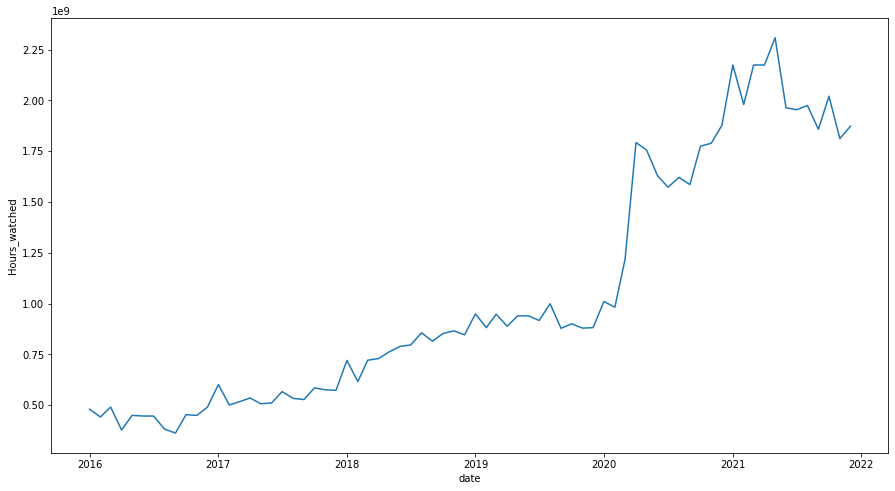

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
data3['Day'] = 1
data3['date'] = pd.to_datetime(data3[['year', 'Month', 'Day']])
data3.drop(['year','Month','Day'],axis=1,inplace=True)
data3
plt.figure(figsize = (15,8))
sns.lineplot(x = 'date', y = 'Hours_watched',data = data3[['date','Hours_watched']])

In [9]:
data3

,Hours_watched,Avg_viewers,Peak_viewers,Streams,Avg_channels,Games_streamed,date
0,480241904,646355,1275257,7701675,20076,"12,149",2016-01-01
1,441859897,635769,1308032,7038520,20427,"12,134",2016-02-01
2,490669308,660389,1591551,7390957,20271,"12,234",2016-03-01
3,377975447,525696,1775120,6869719,16791,"12,282",2016-04-01
4,449836631,605432,1438962,7535519,19394,"12,424",2016-05-01
...,...,...,...,...,...,...,...
67,1974586275,2657585,4778502,20767741,100701,"36,471",2021-08-01
68,1857514531,2583469,5599210,18826493,95513,"35,861",2021-09-01
69,2020197953,2718974,6086487,18209793,91858,"36,406",2021-10-01
70,1812117484,2520330,5941684,17415525,90774,"35,043",2021-11-01


In [10]:
#data1의 month와 year가 int가 나와야하는데 object가 나옴 숫자 이외의 데이터가 존재
print('Month : \n',data1['month'].value_counts())
print('\n\nYear : \n',data1['year'].value_counts())

Month : 
 February     7383
January      7311
December     7255
November     7143
October      7048
             ... 
641.4           1
604.5           1
534.89          1
355.74          1
5398.84         1
Name: month, Length: 1699, dtype: int64


Year : 
 2020          14233
2019          13382
2018          12533
2017          11452
2016           9651
2015           7519
2014           5555
2013           3897
2021           2468
2012           1396
February        152
December        150
January         150
November        147
October         145
September       145
August          144
July            140
June            135
May             132
April           132
March           131
Name: year, dtype: int64


In [11]:
import re
#이상치 데이터 리스트
index = []
for x,y in enumerate(data1['year']):
  try:
    y = int(y)
  except:
    y = y
  if type(y) != int:
    index.append(x)

#temp1 : 이상치 데이터 임시저장  
temp1 = data1.iloc[index].reset_index()
data1 = data1.drop(index)

#temp1에 데이터 중 정제가 필요없는 데이터 temp2에 넣어두기
temp2 = temp1.iloc[:,2:7]
temp1 = temp1.drop(temp1.iloc[:,2:8].columns,axis=1)
temp3 = pd.DataFrame(list(temp1['gamename'].apply(lambda x: x.split('?,'))))
temp1 = temp1.drop('gamename',axis=1)
temp3.columns = ['gamename','year']
temp2.columns = ['month','avg','gain','peak','avg_peak_perc']
temp2 = pd.concat([temp1,temp3,temp2],axis=1)
temp2.index = temp2['index']
temp2 = temp2.drop('index',axis=1)
temp2['year'] = temp2['year'].apply(lambda x: re.sub('[^0-9]','',x))

print(data1.shape)
data1 = pd.concat([data1,temp2],axis=0)
print(data1.shape)

# 월 영문 -> 숫자로 변경 함수
def en_change(data):
  week = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
  return week.index(data.strip())+1


data1['month'] = data1['month'].apply(en_change)
data1.head()

(82086, 7)
(83789, 7)


,gamename,year,month,avg,gain,peak,avg_peak_perc
0,Counter-Strike: Global Offensive,2021,2,741013.24,-2196.42,1123485,65.96%
1,Counter-Strike: Global Offensive,2021,1,743209.66,25405.91,1124553,66.09%
2,Counter-Strike: Global Offensive,2020,12,717803.75,49049.17,1164396,61.65%
3,Counter-Strike: Global Offensive,2020,11,668754.58,55087.89,1037464,64.46%
4,Counter-Strike: Global Offensive,2020,10,613666.69,6816.37,943876,65.02%


In [12]:
#특수문자가 다른것들이 존재해 특수문자 제거 및 대문자로 반환
def gamename_rep(data):
  try:
    data = ''.join(filter(str.isalnum, data))
    return data.upper()
  except:
    print(data)


#나중에 정상적인 이름으로 바꾸기 위한 리스트1
temp_gamename1 = data1['gamename'].unique()

data1['gamename'] = data1['gamename'].apply(gamename_rep)

#나중에 정상적인 이름으로 바꾸기 위한 리스트2
temp_gamename2 = data1['gamename'].unique()
data1.head()

,gamename,year,month,avg,gain,peak,avg_peak_perc
0,COUNTERSTRIKEGLOBALOFFENSIVE,2021,2,741013.24,-2196.42,1123485,65.96%
1,COUNTERSTRIKEGLOBALOFFENSIVE,2021,1,743209.66,25405.91,1124553,66.09%
2,COUNTERSTRIKEGLOBALOFFENSIVE,2020,12,717803.75,49049.17,1164396,61.65%
3,COUNTERSTRIKEGLOBALOFFENSIVE,2020,11,668754.58,55087.89,1037464,64.46%
4,COUNTERSTRIKEGLOBALOFFENSIVE,2020,10,613666.69,6816.37,943876,65.02%


In [13]:
data2 = data2.drop(data2[data2['Game'].isnull()].index, axis=0)
data2['Game'] = data2['Game'].apply(gamename_rep)
data2.head()

,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,LEAGUEOFLEGENDS,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833,69.29
1,2,COUNTERSTRIKEGLOBALOFFENSIVE,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117,57.62
2,3,DOTA2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583,104.26
3,4,HEARTHSTONE,1,2016,39936159,235903 hours,131357,517,36170,53749,317,169.29
4,5,CALLOFDUTYBLACKOPSIII,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549,14.03


In [14]:
print(data2.info())
#Hours_Streamed 를 int로 변환
def cov_int(data):
  data = re.sub('[^0-9]','',data)
  return int(data.strip())
def cov_float(data):
  data = re.sub('%','',data)
  return float(data.strip())
data2['Hours_Streamed'] = data2['Hours_Streamed'].apply(cov_int)
data2.columns = ['Twitch_Rank','Game','Month','Year','Twitch_Hours_watched','Twitch_Hours_Streamed','Twitch_Peak_viewers','Twitch_Peak_channels','Twitch_Streamers','Twitch_Avg_viewers','Twitch_Avg_channels','Twitch_Avg_viewer_ratio']
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14399 entries, 0 to 14399
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              14399 non-null  int64  
 1   Game              14399 non-null  object 
 2   Month             14399 non-null  int64  
 3   Year              14399 non-null  int64  
 4   Hours_watched     14399 non-null  int64  
 5   Hours_Streamed    14399 non-null  object 
 6   Peak_viewers      14399 non-null  int64  
 7   Peak_channels     14399 non-null  int64  
 8   Streamers         14399 non-null  int64  
 9   Avg_viewers       14399 non-null  int64  
 10  Avg_channels      14399 non-null  int64  
 11  Avg_viewer_ratio  14399 non-null  float64
dtypes: float64(1), int64(9), object(2)
memory usage: 1.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14399 entries, 0 to 14399
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---

In [15]:
print(data3.info())
data3['Games_streamed'] = data3['Games_streamed'].apply(cov_int)
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Hours_watched   72 non-null     int64         
 1   Avg_viewers     72 non-null     int64         
 2   Peak_viewers    72 non-null     int64         
 3   Streams         72 non-null     int64         
 4   Avg_channels    72 non-null     int64         
 5   Games_streamed  72 non-null     object        
 6   date            72 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 4.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Hours_watched   72 non-null     int64         
 1   Avg_viewers     72 non-null     int64         
 2   Peak_viewers    72 non-null     int64    

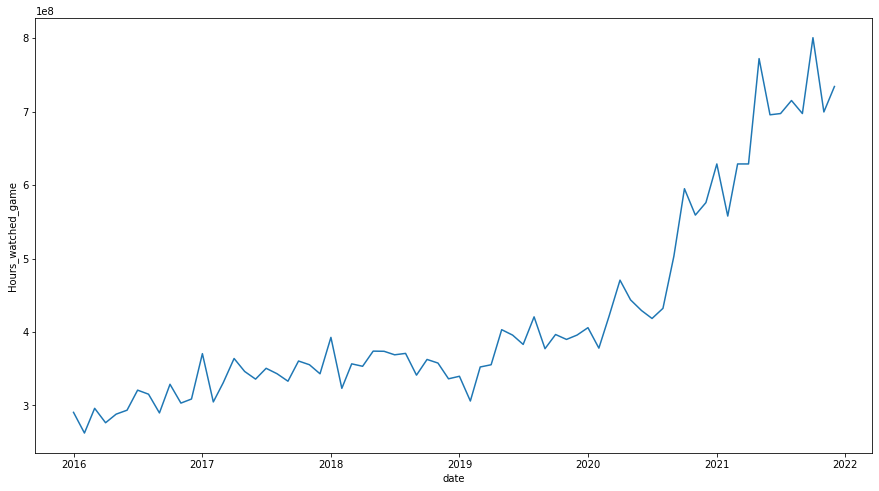

In [16]:
data3['Hours_watched_game'] = data3['Hours_watched']*(data3['Games_streamed']/data3['Avg_channels'])
plt.figure(figsize = (15,8))
sns.lineplot(x = 'date', y = 'Hours_watched_game',data = data3[['date','Hours_watched_game']])

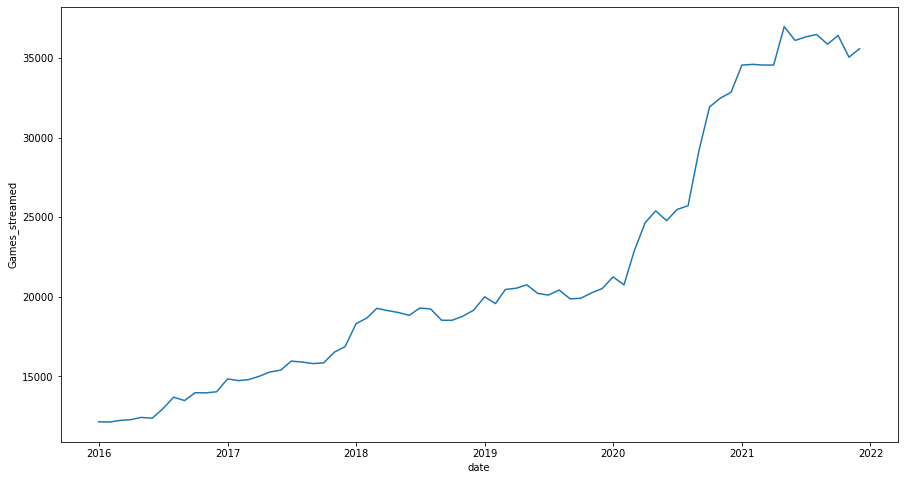

In [17]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'date', y = 'Games_streamed',data = data3[['date','Games_streamed']])

In [18]:
data1.columns = ['Game','Year','Month','Steam_Avg','Steam_Gain','Steam_Peak','Steam_avg_peak_perc']
data1.info()
data1['Year'] = data1['Year'].astype(int)
data1['Steam_Avg'] = data1['Steam_Avg'].astype(float)
data1['Steam_Peak'] = data1['Steam_Peak'].astype(float)
data1['Steam_avg_peak_perc'] = data1['Steam_avg_peak_perc'].apply(cov_float)
data1 = data1[data1['Year']>=2016]
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83789 entries, 0 to 75690
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Game                 83789 non-null  object 
 1   Year                 83789 non-null  object 
 2   Month                83789 non-null  int64  
 3   Steam_Avg            83789 non-null  object 
 4   Steam_Gain           82529 non-null  float64
 5   Steam_Peak           83789 non-null  object 
 6   Steam_avg_peak_perc  83789 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 65015 entries, 0 to 75690
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Game                 65015 non-null  object 
 1   Year                 65015 non-null  int64  
 2   Month                65015 non-null  int64  
 3   Steam_Avg        

,Game,Year,Month,Steam_Avg,Steam_Gain,Steam_Peak,Steam_avg_peak_perc
0,COUNTERSTRIKEGLOBALOFFENSIVE,2021,2,741013.24,-2196.42,1123485.0,65.96
1,COUNTERSTRIKEGLOBALOFFENSIVE,2021,1,743209.66,25405.91,1124553.0,66.09
2,COUNTERSTRIKEGLOBALOFFENSIVE,2020,12,717803.75,49049.17,1164396.0,61.65
3,COUNTERSTRIKEGLOBALOFFENSIVE,2020,11,668754.58,55087.89,1037464.0,64.46
4,COUNTERSTRIKEGLOBALOFFENSIVE,2020,10,613666.69,6816.37,943876.0,65.02


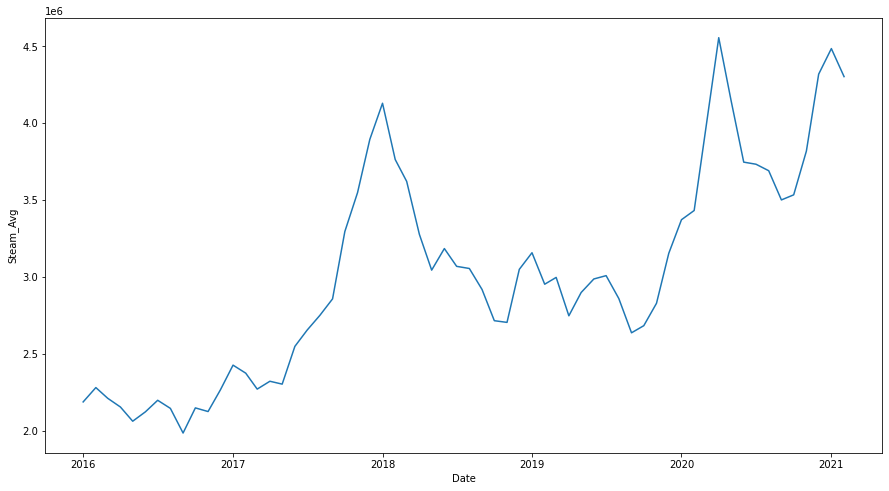

In [19]:
view_pr = data1
view_pr['Day'] = 1
view_pr['Date'] = pd.to_datetime(view_pr[['Year', 'Month', 'Day']])
view_pr = view_pr.drop(['Year', 'Month', 'Day'],axis=1)
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Date', y = 'Steam_Avg',data = view_pr.groupby('Date').sum().reset_index()[['Date','Steam_Avg']])

In [20]:
#최종 데이터
sData = pd.merge(left=data2,right=data1,how='left',on=['Game','Year','Month'],sort=False)
test = sData[sData['Steam_Avg'].isnull()==True]
sData = sData[sData['Steam_Avg'].isnull()==False]
sData

,Twitch_Rank,Game,Month,Year,Twitch_Hours_watched,Twitch_Hours_Streamed,Twitch_Peak_viewers,Twitch_Peak_channels,Twitch_Streamers,Twitch_Avg_viewers,Twitch_Avg_channels,Twitch_Avg_viewer_ratio,Steam_Avg,Steam_Gain,Steam_Peak,Steam_avg_peak_perc,Day,Date
1,2,COUNTERSTRIKEGLOBALOFFENSIVE,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62,365371.09,-12076.02,667432.0,54.74,1.0,2016-01-01
2,3,DOTA2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26,612174.78,38830.53,1067949.0,57.32,1.0,2016-01-01
4,5,CALLOFDUTYBLACKOPSIII,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03,14292.49,-3074.66,30760.0,46.46,1.0,2016-01-01
15,16,TOMCLANCYSRAINBOWSIXSIEGE,1,2016,4866039,242134,25742,694,42244,6549,325,20.10,10244.29,2302.84,20006.0,51.21,1.0,2016-01-01
18,19,GRANDTHEFTAUTOV,1,2016,4014296,407172,32724,1197,85441,5402,548,9.86,46993.33,3118.61,93726.0,50.14,1.0,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12392,194,DARKSOULSII,2,2021,625434,39170,10768,129,3577,932,58,15.97,259.40,-75.81,447.0,58.03,1.0,2021-02-01
12394,196,SUBNAUTICA,2,2021,620721,63448,6780,191,8854,925,94,9.78,3039.09,-1040.61,4937.0,61.56,1.0,2021-02-01
12395,197,CUPHEAD,2,2021,614312,32868,18368,114,7997,915,48,18.69,1023.95,-219.11,1720.0,59.53,1.0,2021-02-01
12396,198,GRAVEYARDKEEPER,2,2021,613821,6608,21608,33,772,914,9,92.89,869.89,-411.06,1894.0,45.93,1.0,2021-02-01


In [21]:
'''
구하고자 하는 목표! 평균적인 라이브 스트리밍에 대한 스팀내 평균 플레이 인원을 구하고 싶다
고민 : 순위가 필요한가... 목적이 순위가 이나고 방송인기에 따른 스팀의 데이터기 때문에 필요없다고 추측
'''
sData['Day'] = 1
test['Day'] = 1
#Year Month Day 하나로 합치기 = Date
sData['Date'] = pd.to_datetime(sData[['Year', 'Month', 'Day']])
test['Date'] = pd.to_datetime(test[['Year', 'Month', 'Day']])

test.drop(['Twitch_Rank','Year','Month','Day','Steam_Gain','Steam_Peak','Steam_avg_peak_perc'],axis=1,inplace=True)
sData.drop(['Twitch_Rank','Year','Month','Day','Steam_Gain','Steam_Peak','Steam_avg_peak_perc'],axis=1,inplace=True)
sData

,Game,Twitch_Hours_watched,Twitch_Hours_Streamed,Twitch_Peak_viewers,Twitch_Peak_channels,Twitch_Streamers,Twitch_Avg_viewers,Twitch_Avg_channels,Twitch_Avg_viewer_ratio,Steam_Avg,Date
1,COUNTERSTRIKEGLOBALOFFENSIVE,47832863,830105,372654,2197,120849,64378,1117,57.62,365371.09,2016-01-01
2,DOTA2,45185893,433397,315083,1100,44074,60815,583,104.26,612174.78,2016-01-01
4,CALLOFDUTYBLACKOPSIII,16153057,1151578,71639,3620,214054,21740,1549,14.03,14292.49,2016-01-01
15,TOMCLANCYSRAINBOWSIXSIEGE,4866039,242134,25742,694,42244,6549,325,20.10,10244.29,2016-01-01
18,GRANDTHEFTAUTOV,4014296,407172,32724,1197,85441,5402,548,9.86,46993.33,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...
12392,DARKSOULSII,625434,39170,10768,129,3577,932,58,15.97,259.40,2021-02-01
12394,SUBNAUTICA,620721,63448,6780,191,8854,925,94,9.78,3039.09,2021-02-01
12395,CUPHEAD,614312,32868,18368,114,7997,915,48,18.69,1023.95,2021-02-01
12396,GRAVEYARDKEEPER,613821,6608,21608,33,772,914,9,92.89,869.89,2021-02-01


In [22]:
'''
상위 10개의 데이터에 대한 시간별 그래프 그려보기
'''
all_play_rank = sData[['Game','Steam_Avg']].groupby('Game').sum()
all_watched_rank = sData[['Game','Twitch_Hours_watched']].groupby('Game').sum()
all_stream_rank = sData[['Game','Twitch_Hours_Streamed']].groupby('Game').sum()

print('----- all_play_rank -----\n',all_play_rank.sort_values(by='Steam_Avg',ascending=False).head(10))
print('----- all_watched_rank -----\n',all_watched_rank.sort_values(by='Twitch_Hours_watched',ascending=False).head(10))
print('----- all_stream_rank -----\n',all_stream_rank.sort_values(by='Twitch_Hours_Streamed',ascending=False).head(10))

----- all_play_rank -----
                                 Steam_Avg
Game                                     
DOTA2                         31282401.69
COUNTERSTRIKEGLOBALOFFENSIVE  26639003.67
PLAYERUNKNOWNSBATTLEGROUNDS   23137194.31
GRANDTHEFTAUTOV                4009093.04
TOMCLANCYSRAINBOWSIXSIEGE      3314894.83
ARKSURVIVALEVOLVED             2677276.73
WARFRAME                       2673567.48
RUST                           2539055.20
ROCKETLEAGUE                   2265017.73
GARRYSMOD                      1547876.23
----- all_watched_rank -----
                               Twitch_Hours_watched
Game                                              
COUNTERSTRIKEGLOBALOFFENSIVE            2648072003
DOTA2                                   2497508003
GRANDTHEFTAUTOV                         1919935897
PLAYERUNKNOWNSBATTLEGROUNDS             1428794290
DEADBYDAYLIGHT                           528547477
TOMCLANCYSRAINBOWSIXSIEGE                523053594
RUST                           

In [23]:
from sklearn.model_selection import train_test_split

cutOff = pd.to_datetime('2020-01-01')
train = sData[sData['Date']<cutOff]
val = sData[sData['Date']>=cutOff]


In [24]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(train, minimal=True).to_notebook_iframe()

In [25]:
y_train = train['Steam_Avg']
X_train = train.drop(['Steam_Avg','Game','Date'],axis=1)
y_val = val['Steam_Avg']
X_val = val.drop(['Steam_Avg','Game','Date'],axis=1)

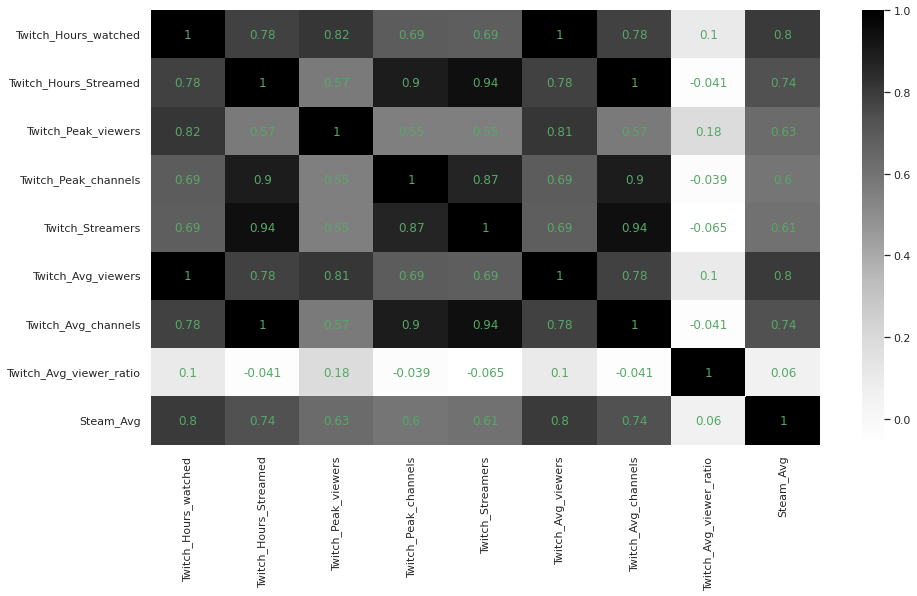

In [26]:
#상관계수 그려보기
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
corr_df = train.corr()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

In [27]:
X_train = X_train.drop(['Twitch_Avg_viewer_ratio'],axis=1)
X_val = X_val.drop(['Twitch_Avg_viewer_ratio' ],axis=1)

In [28]:
#baseline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor
model_test = XGBRegressor(random_state=2)
model_test.fit(X_train, y_train)
y_pred = model_test.predict(X_val)

print('r2_score : ',-r2_score(y_val, y_pred))
print('MAE      : ',mean_absolute_error(y_val, y_pred))

[05:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score :  0.5976943850788301
MAE      :  31783.50071773019


In [29]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import TransformedTargetRegressor
import numpy as np

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, 25, 30], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=2), 
    param_distributions=param_distributions, 
    n_iter=100, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    return_train_score=True, 
    n_jobs=-1, 
    random_state=2
)

search.fit(X_train, y_train)
print('최적 하이퍼파라미터: ', search.best_params_)
print('CV MAE: ', -search.best_score_)
model = search.best_estimator_
-(model.score(X_val, y_val))
# 최적 하이퍼파라미터:  {'max_depth': 15, 'max_features': 0.5749535347070858, 'n_estimators': 261}
# CV MAE:  12292.30476372437
# 0.8520348600710483

# logTransForned = TransformedTargetRegressor(regressor=search,
#                                 func=np.log1p, inverse_func=np.expm1)
# logTransForned.fit(X_train, y_train)

# print('최적 하이퍼파라미터: ', logTransForned.score(X_val, y_val))
    #### 최적 하이퍼파라미터:  0.8697601390117912

최적 하이퍼파라미터:  {'max_depth': 15, 'max_features': 0.5749535347070858, 'n_estimators': 261}
CV MAE:  12292.30476372437


0.8520348600710483

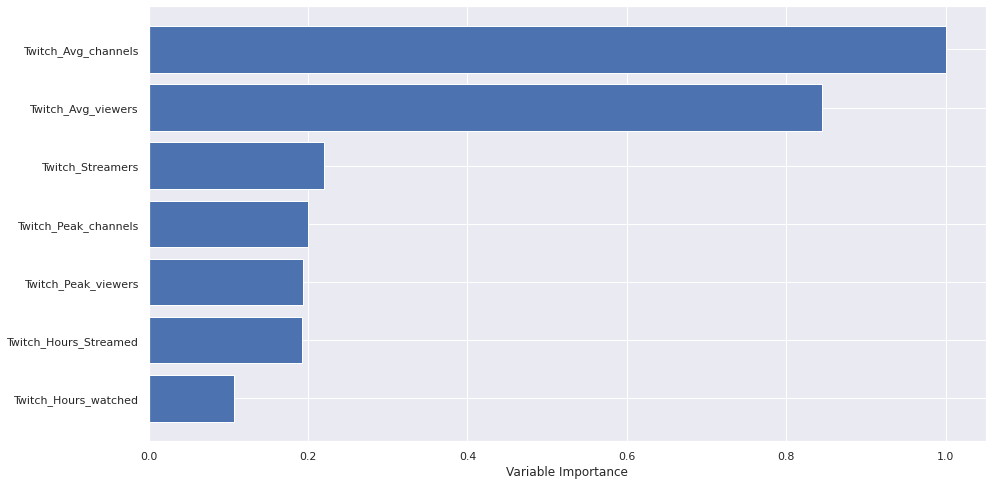

In [30]:
import matplotlib.pyplot as plot

featureImportance = model.feature_importances_
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plot.barh(barPos, featureImportance[sorted_idx], align='center')
plot.yticks(barPos, model.feature_names_in_)
plot.xlabel('Variable Importance')
plot.show()

In [31]:
pd.DataFrame(search.cv_results_).sort_values(by='rank_test_score').T

,43,7,19,20,4,82,30,26,10,84,...,76,64,2,99,13,81,90,83,45,0
mean_fit_time,4.265721,5.651665,3.993502,4.840442,2.71793,6.377527,4.242047,5.921828,1.906888,5.450434,...,1.050268,0.979215,0.802778,0.590031,1.304742,1.597977,1.073469,1.787917,0.50266,1.447639
std_fit_time,0.033722,0.035381,0.020968,0.029748,0.022169,0.05741,0.027268,0.08001,0.031692,0.024185,...,0.011827,0.006164,0.007847,0.008657,0.247098,0.020686,0.007438,0.012833,0.005734,0.104971
mean_score_time,0.08346,0.148671,0.099035,0.118148,0.059616,0.160143,0.105737,0.101504,0.040761,0.144281,...,0.055282,0.052944,0.042083,0.031658,0.060886,0.081673,0.06652,0.092914,0.027329,0.064644
std_score_time,0.003075,0.004586,0.004543,0.00311,0.008044,0.004289,0.003239,0.003758,0.000608,0.006535,...,0.006779,0.004453,0.00079,0.001415,0.001465,0.001101,0.006292,0.004206,0.000708,0.006596
param_max_depth,15,15,15,15,15,20,15,20,25,20,...,10,10,15,15,5,5,5,5,5,5
param_max_features,0.574954,0.546207,0.567144,0.436747,0.632738,0.444571,0.517431,0.800258,0.596745,0.539698,...,0.042429,0.051488,0.154427,0.043129,0.201743,0.153566,0.004664,0.008448,0.106573,0.185082
param_n_estimators,261,430,304,366,166,428,323,268,100,366,...,206,193,125,92,321,432,295,492,138,122
params,"{'max_depth': 15, 'max_features': 0.5749535347...","{'max_depth': 15, 'max_features': 0.5462073199...","{'max_depth': 15, 'max_features': 0.5671441276...","{'max_depth': 15, 'max_features': 0.4367472630...","{'max_depth': 15, 'max_features': 0.6327377306...","{'max_depth': 20, 'max_features': 0.4445709417...","{'max_depth': 15, 'max_features': 0.5174307637...","{'max_depth': 20, 'max_features': 0.8002583511...","{'max_depth': 25, 'max_features': 0.5967453089...","{'max_depth': 20, 'max_features': 0.5396978043...",...,"{'max_depth': 10, 'max_features': 0.0424291918...","{'max_depth': 10, 'max_features': 0.0514881883...","{'max_depth': 15, 'max_features': 0.1544266730...","{'max_depth': 15, 'max_features': 0.0431290363...","{'max_depth': 5, 'max_features': 0.20174322626...","{'max_depth': 5, 'max_features': 0.15356567065...","{'max_depth': 5, 'max_features': 0.00466352273...","{'max_depth': 5, 'max_features': 0.00844836357...","{'max_depth': 5, 'max_features': 0.10657253521...","{'max_depth': 5, 'max_features': 0.18508207817..."
split0_test_score,-11486.33516,-11554.780868,-11579.544036,-11587.984906,-11540.904085,-11640.356965,-11579.462743,-11261.237104,-11437.036209,-11687.18175,...,-13739.902419,-13849.860427,-14186.610837,-14334.035632,-14432.452618,-14591.286957,-14572.020736,-14706.800519,-14692.187869,-14755.495697
split1_test_score,-11809.653078,-11697.835221,-11662.413262,-11661.626488,-11766.817092,-11706.177085,-11676.647461,-11869.188084,-11842.752321,-11718.575295,...,-11666.221069,-11690.138436,-11462.469232,-11423.20233,-12194.793464,-12269.559911,-12184.809723,-12291.177304,-12321.063529,-12363.121427


In [32]:
test_temp = test.drop(['Steam_Avg','Game','Date','Twitch_Avg_viewer_ratio'],axis=1)
test.iloc[[0]]

,Game,Twitch_Hours_watched,Twitch_Hours_Streamed,Twitch_Peak_viewers,Twitch_Peak_channels,Twitch_Streamers,Twitch_Avg_viewers,Twitch_Avg_channels,Twitch_Avg_viewer_ratio,Steam_Avg,Date
0,LEAGUEOFLEGENDS,94377226,1362044,530270,2903,129172,127021,1833,69.29,NaN,2016-01-01


In [33]:
import shap

def explain(row_number):
    # row 값을 변환합니다
    row = test_temp.iloc[[row_number]]
    # 예측하고 예측확률을 얻습니다 
    explainer = shap.TreeExplainer(model)
    pred = model.predict(row)
    # SHAP를 추가합니다
    shap_values = explainer.shap_values(row)
    print('shap_values : ', shap_values)
    feature_names = row.columns
    print('feature_names : ', feature_names)
    feature_values = row.values[0]
    print('feature_values : ', feature_values)
    shaps = pd.Series(shap_values[0], zip(feature_names, feature_values))
    pros = shaps.sort_values(ascending=False)[:3].index
    cons = shaps.sort_values(ascending=True)[:3].index

    # 예측에 가장 영향을 준 top3
    print('\n')
    print('Positive 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    
    for i, info in enumerate(pros, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # 예측에 가장 반대적인 영향을 준 요인 top1
    print('\n')
    print('Negative 영향을 가장 많이 주는 3가지 요인 입니다:')
    
    
    
    for i, info in enumerate(cons, start=1):
        feature_name, feature_value = info
        print(f'{i}. {feature_name} : {feature_value}')

    # SHAP
    shap.initjs()
    return shap.force_plot(
        base_value=explainer.expected_value, 
        shap_values=shap_values, 
        features=row, 
    )

explain(0)

shap_values :  [[135469.98174912  71435.82096793  60720.38111219 -12035.26843361
   -1943.7304874  170684.18634772  59046.12821438]]
feature_names :  Index(['Twitch_Hours_watched', 'Twitch_Hours_Streamed', 'Twitch_Peak_viewers',
       'Twitch_Peak_channels', 'Twitch_Streamers', 'Twitch_Avg_viewers',
       'Twitch_Avg_channels'],
      dtype='object')
feature_values :  [94377226  1362044   530270     2903   129172   127021     1833]


Positive 영향을 가장 많이 주는 3가지 요인 입니다:
1. Twitch_Avg_viewers : 127021
2. Twitch_Hours_watched : 94377226
3. Twitch_Hours_Streamed : 1362044


Negative 영향을 가장 많이 주는 3가지 요인 입니다:
1. Twitch_Peak_channels : 2903
2. Twitch_Streamers : 129172
3. Twitch_Avg_channels : 1833


In [34]:
test_tri = test.reset_index().drop(['index','Steam_Avg'],axis=1)
pred_list = model.predict(test_temp)
pred = pd.DataFrame(pred_list)
test_tri['pred'] = pred[0]/test_tri['Twitch_Avg_viewers']

In [35]:
test_tri['pred'].mean()

7.661001359625053

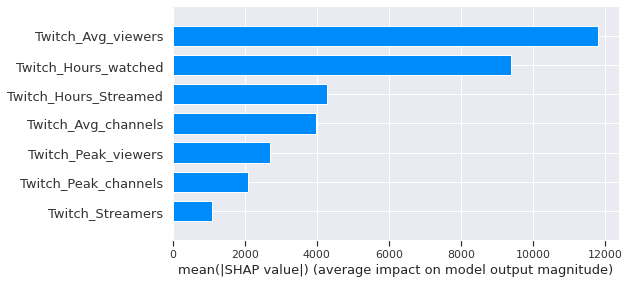

In [36]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_temp.iloc[:300])
shap.summary_plot(shap_values, test_temp.iloc[:300], plot_type="bar")